<a href="https://colab.research.google.com/github/kirannair97/learning-python-2023/blob/main/P14_Pandas_and_Excel_Export.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Pandas and Excel Export

### Goal:
1.   Learn how to use Pandas DataFrames
2.   Export to Excel spreadsheets

### Description
- import pandas as pd
- Read the CSV file files/SalesData.csv with pandas
    - Remember to set index_col to Date, delimiter to ';' and parse_dates to True
- Group the data by **Sales rep** and sum it
- Group the data by month
    - HINT: Use pd.Grouper(freq='M')
    - HINT: Change the index naming to use month names
- Export the data to Excel
    - Create an ExcelWriter from Pandas
    - Write a sheet with **Sales rep** data create above (remember to set sheet_name)
    - Write a sheet with **Monthly** data created above (remember to set sheet_name)
- Bonus:
    - Create charts column charts for each sheet.
    - Use the simple way we created it.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/kirannair97/learning-python-2023/main/SalesData.csv", delimiter = ';', parse_dates = True, index_col = 'Date')

In [3]:
data

,Sales rep,Item,Price,Quantity,Sale
Date,,,,,
2020-05-31,Mia,Markers,4,1,4
2020-02-01,Mia,Desk chair,199,2,398
2020-09-21,Oliver,Table,1099,2,2198
2020-07-15,Charlotte,Desk pad,9,2,18
2020-05-27,Emma,Book,12,1,12
...,...,...,...,...,...
2020-02-28,Oliver,Desk chair,199,5,995
2020-10-01,Sophia,Table,1099,4,4396
2020-07-28,Sophia,Book,12,1,12


In [5]:
data.dtypes

Sales rep    object
Item         object
Price         int64
Quantity      int64
Sale          int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2020-05-31 to 2020-01-26
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sales rep  1000 non-null   object
 1   Item       1000 non-null   object
 2   Price      1000 non-null   int64 
 3   Quantity   1000 non-null   int64 
 4   Sale       1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [14]:
rep_sales = data.groupby('Sales rep').sum()['Sale']

In [16]:
rep_sales

Sales rep
Charlotte     74599
Emma          65867
Ethan         40970
Liam          66989
Mia           88199
Noah          78575
Oliver        89355
Sophia       103480
William       80400
Name: Sale, dtype: int64

In [35]:
monthly_sale = data.groupby(pd.Grouper(freq = 'M')).sum()['Sale']

In [36]:
monthly_sale

Date
2020-01-31    69990
2020-02-29    51847
2020-03-31    67500
2020-04-30    58401
2020-05-31    40319
2020-06-30    59397
2020-07-31    64251
2020-08-31    51571
2020-09-30    55666
2020-10-31    50093
2020-11-30    57458
2020-12-31    61941
Freq: M, Name: Sale, dtype: int64

In [37]:
monthly_sale.index = monthly_sale.index.month_name()

In [38]:
monthly_sale

Date
January      69990
February     51847
March        67500
April        58401
May          40319
June         59397
July         64251
August       51571
September    55666
October      50093
November     57458
December     61941
Name: Sale, dtype: int64

In [40]:
workbook = pd.ExcelWriter('SalesReport.xlsx')
rep_sales.to_excel(workbook, sheet_name = 'Sales per rep')
monthly_sale.to_excel(workbook, sheet_name = 'Monthly')
workbook.close()

In [42]:
pip install XlsxWriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 12.5 MB/s eta 0:00:00


In [45]:
workbook = pd.ExcelWriter('SalesReport.xlsx')
rep_sales.to_excel(workbook, sheet_name = 'Sales per rep')
monthly_sale.to_excel(workbook, sheet_name = 'Monthly')

chart1 = workbook.book.add_chart({'type' : 'column'})

# Configure the first series.abs
chart1.add_series({
    'name': 'Sales per rep',
    'categories': "='Sales per rep'!$A$2:$A$10",
    'values': "='Sales per rep'!$B$2:$B$10",

})

workbook.sheets['Sales per rep'].insert_chart('D2', chart1)

chart1 = workbook.book.add_chart({'type' : 'column'})

# Configure the first series.abs
chart1.add_series({
    'name': 'Monthly sales',
    'categories': '=Monthly!$A$2:$A$13',
    'values': '=Monthly!$B$2:$B$13',

})

workbook.sheets['Monthly'].insert_chart('D2', chart1)

workbook.close()

*Output SS below: Charts created on xlsx file *

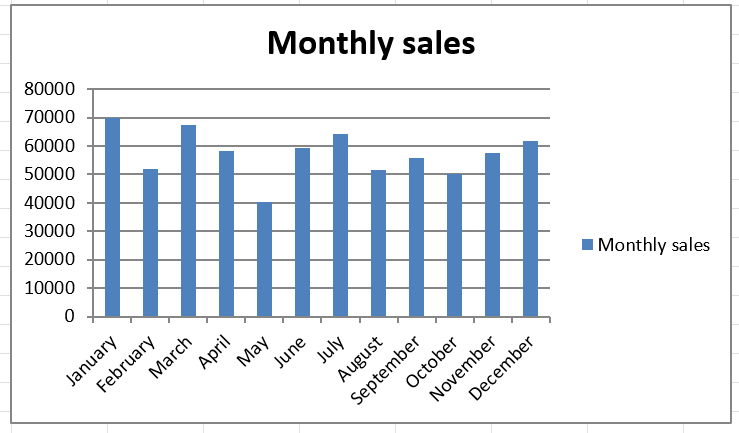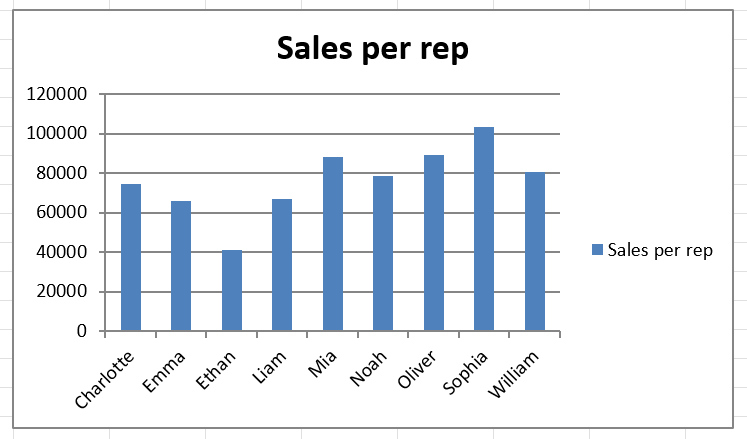